# Programming Assignment-2
The goal of this assingment is to allow you to practice several the following things in Python:
1. Perfoming typical data processing (or preprocessing if you prefer). This includes all the typical data wraning such as creating news variables, combining several datasets and more 
2. Running explolatory data analysis including basic plotting of variables 
3. Perfoming basic inferential statisticals using statsmodels and scipy to run hypythesis testing and build simple statistial or econometric models.

## Datasets 
For this assignment, you will use the following datasets:
### Rwanda Health Indicators
The Excel file was generated by combining multiple CSV files, each containing data on different health indicators for Rwanda, So that each sheet in the file represent one such indicator. See below some of the input files which were used:
- `access-to-health-care_subnational_rwa`
- `child-mortality-rates_subnational_rwa`
- `dhs-mobile_subnational_rwa`

You can download the dataset from [here](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true).
### Nights lights Data
- Please download it [here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=sharing) and check the documentation in the cells below. 

### Popupation Dataset
- Please download it [here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=share_link) and check the documentation and metadata in the class notebooks.


## Submission Guidelines 
- Please guidelines and complete all steps in the [GitHub Workflow](https://dmatekenya.github.io/AIMS-DSCBI/course-requirements/github-workflow.html)
- Once you have completed your assignment, push chanegs to your repository.
- Send a link (copy from within GitHub) to your notebook to the tutors/teaching assistants


# Import Required Packages

In [3]:
from pathlib import Path
import pandas as pd

# Setup Input Folders

As usual, it is good practice to set up input folders using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) package. In this section, make sure to define the folders where your data is stored on your machine.

I find it helpful to set up the working directory and input data folders right at the start of the notebook. To keep things organized, I use the naming convention: `FILE_{NAME}` for files and `DIR_{NAME}` for folders. We use capital letters because these are global variables that will be referenced throughout the notebook.

We'll be using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library, which offers several advantages over traditional string-based path handling:

- **Cross-platform compatibility** - automatically handles path separators (`/` vs `\`) across different operating systems
- **Object-oriented approach** - paths are objects with useful methods rather than strings
- **Intuitive syntax** - use `/` operator to join paths naturally: `parent_dir / "subfolder" / "file.txt"`
- **Built-in path operations** - methods like `.exists()`, `.is_file()`, `.parent`, `.stem`, and `.suffix`
- **Safer path manipulation** - reduces errors from manual string concatenation and splitting

This is the recommended approach for managing file paths in modern Python development.


In [4]:
# Uncomment the following lines and add your code to define the directories and files
DIR_DATA = Path.cwd().parents[0].joinpath("assignments/Data")
FILE_EXCEL = DIR_DATA/"RW-Health-Data.xlsx"

# Population by enumeration area (EA) for Malawi
FILE_POP_MW = DIR_DATA/"rwa-cell-pop.csv"
FILE_NIGHTLIGHT = DIR_DATA/"cell-ntl-2015-2020-2024.csv"

In [5]:
Path.cwd().parents[0].joinpath("assignements")

WindowsPath('c:/Users/malio/Desktop/AIMS-DSCBI/notebooks/assignements')

# Part 1: Processing Excel Files
The primary goal is to preprocess an [Excel file](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true) with multiple sheets into a unified CSV dataset that consolidates multiple indicators. Having all indicators in a single file at the same analytical unit (national, subnational) is more efficient than managing separate files and enables easier cross-indicator analysis.

## Task 1: Generate National-Level Summaries

For each indicator, compute a single national-level value using appropriate aggregation functions such as **mean**, **sum** or **count**. For this one, all available indicators can be summarized at national level, so we will have a CSV file with one row and 

### Expected Output Structure
1. **DataFrame display** in Jupyter Notebook
2. **CSV file** with columns:
- `indicator_name`: Name of the indicator
- `aggregated_value`: Computed national value
- `indicator_year`: Survey year or something similar
- `survey_name`: Name of the survey where information is coming from
- `aggregation_method`: Statistical method used (optional)



In [6]:
health_data = pd.read_excel(FILE_EXCEL, sheet_name=None)
health_data.keys()
list_df=[]
for key,df in health_data.items():
    df["indicator_name"] = key
    df = df.drop([0])# drop the first column because it is not needed
    list_df.append(df)
df =pd.concat(list_df, ignore_index=True)# concatenate all dataframes
df["Value"]=df["Value"].astype(float)  # convert the Value column to float
df.head()# display the first few rows of the dataframe

,ISO3,Location,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,...,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank,indicator_name
0,RWA,Butare/Gitarama,1042036,Total fertility rate 15-49,5.2,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442006,1992,DHS,NaN,NaN,NaN,NaN,1.0,dhs-mobile_subnational_rwa
1,RWA,Butare,1054424,Total fertility rate 15-49,4.8,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442007,1992,DHS,NaN,NaN,NaN,NaN,NaN,dhs-mobile_subnational_rwa
2,RWA,Gitarama,7453122,Total fertility rate 15-49,5.5,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442008,1992,DHS,NaN,NaN,NaN,NaN,NaN,dhs-mobile_subnational_rwa
3,RWA,Byumba/Kibungo,1054417,Total fertility rate 15-49,6.4,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442009,1992,DHS,NaN,NaN,NaN,NaN,1.0,dhs-mobile_subnational_rwa
4,RWA,Byumba,1042073,Total fertility rate 15-49,6.2,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442010,1992,DHS,NaN,NaN,NaN,NaN,NaN,dhs-mobile_subnational_rwa


In [7]:
df.columns

Index(['ISO3', 'Location', 'DataId', 'Indicator', 'Value', 'Precision',
       'DHS_CountryCode', 'CountryName', 'SurveyYear', 'SurveyId',
       'IndicatorId', 'IndicatorOrder', 'IndicatorType', 'CharacteristicId',
       'CharacteristicOrder', 'CharacteristicCategory', 'CharacteristicLabel',
       'ByVariableId', 'ByVariableLabel', 'IsTotal', 'IsPreferred', 'SDRID',
       'RegionId', 'SurveyYearLabel', 'SurveyType', 'DenominatorWeighted',
       'DenominatorUnweighted', 'CILow', 'CIHigh', 'LevelRank',
       'indicator_name'],
      dtype='object')

In [8]:
cols = ["indicator_name", "Value", "SurveyYear", "SurveyType"]
df = df[cols]  # keep only the specified columns 
df = df.rename(columns={"SurveyYear": "indicator_year", "SurveyType": "survey_name"})  # rename columns 
print(df)  

                        indicator_name  Value indicator_year survey_name
0           dhs-mobile_subnational_rwa    5.2           1992         DHS
1           dhs-mobile_subnational_rwa    4.8           1992         DHS
2           dhs-mobile_subnational_rwa    5.5           1992         DHS
3           dhs-mobile_subnational_rwa    6.4           1992         DHS
4           dhs-mobile_subnational_rwa    6.2           1992         DHS
...                                ...    ...            ...         ...
20709  symptoms-of-acute-respiratory-i   51.0           2019         DHS
20710  symptoms-of-acute-respiratory-i   15.0           2019         DHS
20711  symptoms-of-acute-respiratory-i   20.0           2019         DHS
20712  symptoms-of-acute-respiratory-i   21.0           2019         DHS
20713  symptoms-of-acute-respiratory-i   29.0           2019         DHS

[20714 rows x 4 columns]


In [9]:
df.groupby(['indicator_name'])['Value'].mean().reset_index().rename(columns={'Value': 'Aggregated_Value'}) # aggregate the Value column by indicator_name and calculate the mean

,indicator_name,Aggregated_Value
0,access-to-health-care_subnation,153.507087
1,child-mortality-rates_subnation,272.997849
2,covid-19-prevention_subnational,23.025123
3,dhs-mobile_subnational_rwa,39.913780
4,dhs-quickstats_subnational_rwa,37.634703
5,fertility-rates_subnational_rwa,109.269363
6,health-insurance_subnational_rw,524.363750
7,immunization_subnational_rwa,103.991398
8,mens-fertility-and-family-plann,35.982992
9,symptoms-of-acute-respiratory-i,338.529051


## Task 2: Subnational-Level Indicator Dataset

Create a merged dataset for indicators with subnational data (ADM2/ADM3 levels), ensuring spatial alignment and consistent administrative boundaries.

### Expected Output Structure
   - `indicator_name`: Name of the indicator
   - `aggregated_value`: Computed national value
   - `indicator_year`: Survey year or something similar
   - `survey_name`: Name of the survey where information is coming from
   - `aggregation_method`: Statistical method used (optional)

This structure enables both single-indicator and multi-indicator analysis at the subnational level.

In [10]:
df.groupby(['indicator_name','indicator_year','survey_name'])['Value'].mean().reset_index().rename(columns={'Value': 'Aggregated_Value'})# aggregate the Value column by indicator_name, indicator_year, and survey_name and calculate the mean

,indicator_name,indicator_year,survey_name,Aggregated_Value
0,access-to-health-care_subnation,1992,DHS,110.413875
1,access-to-health-care_subnation,2000,DHS,126.786330
2,access-to-health-care_subnation,2005,DHS,226.398102
3,access-to-health-care_subnation,2008,DHS,141.172432
4,access-to-health-care_subnation,2010,DHS,211.736398
...,...,...,...,...
69,symptoms-of-acute-respiratory-i,2005,DHS,518.428333
70,symptoms-of-acute-respiratory-i,2008,DHS,284.960000
71,symptoms-of-acute-respiratory-i,2010,DHS,452.570312
72,symptoms-of-acute-respiratory-i,2015,DHS,391.584286


## Introduction to Nightlights Dataset

## What is Nightlight Data?

Nightlight data is satellite imagery capturing artificial light emissions from Earth's surface during nighttime. Satellites like VIIRS collect this data regularly, providing an **objective, real-time measure of human economic activity and development**.

### Raw Data: Radiance Measurements
The fundamental measurement in nightlight data is **radiance** - the amount of light energy detected by satellite sensors, measured in **nanowatts per square centimeter per steradian (nW/cm²/sr)**. Each pixel in satellite imagery contains a radiance value representing the light intensity from that specific location on Earth's surface.

### Annual Composite Generation
This dataset was created from **annual composite images** using VIIRS nightlight files for Rwanda. Annual composites are generated by:

- **Aggregating daily/monthly observations** throughout each year (2015, 2020, 2024)
- **Filtering out temporary light sources** (fires, lightning, aurora)
- **Removing cloud-affected observations** to ensure clear measurements
- **Averaging or taking median values** to create stable, representative annual measurements
- **Masking techniques** to exclude areas with unreliable data

The files used include both **average composites** (`average_masked`) and **median composites** (`median_masked`), with **cloud-free versions** (`vcmslcfg`) preferred over cloud-inclusive versions (`vcmcfg`) for more accurate measurements.

### Why Use Nightlight Data?

- **Consistent global coverage** - Available everywhere, regardless of local data quality
- **Real-time updates** - More current than traditional economic statistics
- **Objective measurement** - Not subject to reporting biases
- **High resolution** - Captures local development patterns
- **Proxy for development** - Light intensity correlates with economic activity, infrastructure, and quality of life

## Dataset Overview 

- **6,507 observations** across Rwanda's administrative cells
- **Three time periods**: 2015, 2020, 2024
- **Cell-level data** - Rwanda's smallest administrative units
- Allows temporal analysis of development trends

---

## Variable Definitions

### Administrative Identifiers
- **`cell_id`** - Unique identifier for linking with other datasets
- **`province_name`** - Province (5 total in Rwanda)
- **`district_name`** - District (30 total in Rwanda) 
- **`sector_name`** - Administrative level between district and cell
- **`cell_name`** - Specific cell name

### Core Nightlight Measurements

#### `total_nightlight`
- **Sum of all radiance values** within cell boundaries
- **Key indicator** of overall economic activity/development
- Higher values = more total development

#### `mean_nightlight` 
- **Average radiance** per pixel
- Indicates development intensity regardless of cell size
- Useful for comparing cells of different areas

#### `median_nightlight`
- **Middle radiance value** of all pixels (less sensitive to outliers)
- Better represents typical lighting in unevenly developed areas

#### `max_nightlight`
- **Highest radiance** within cell
- Indicates major infrastructure (hospitals, commercial centers)

#### `min_nightlight` & `std_nightlight`
- Minimum radiance and standard deviation
- High std = uneven development within cell

### Spatial Coverage Indicators

#### `pixel_count`
- **Total pixels** in cell (indicates geographic size)
- Used to normalize other measurements

#### `lit_pixel_count`
- **Number of pixels with detectable light** (radiance > 0)
- Shows spatial extent of development

#### `lit_pixel_percentage`
- **Percentage of cell area with lighting**
- Formula: `(lit_pixel_count ÷ pixel_count) × 100`
- **0% = completely dark, 100% = fully developed**

#### `year`
- Time period: 2015, 2020, or 2024

# Part-2: Demographic and Nightlights Data

## Part A: Varible Generation and Data Integration

### Population Dataset Variables (`rwa-cell-pop.csv`):
Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy. Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.



# `SOLUTION2 PARTA`

In [11]:
df =pd.read_csv(FILE_POP_MW)

In [12]:
#1. Adding working age population
def working_age_population(row):
    return row['general_2020'] - (row['children_under_five_2020'] + row['elderly_60_plus_2020'])
df['working_age_population'] = df.apply(working_age_population, axis=1)
#2. Adding people_per_building
def people_per_building(row):
    return row['general_2020'] / row['building_count'] if row['building_count'] > 0 else 0
df['people_per_building'] = df.apply(people_per_building, axis=1)

#3. Adding dependency ratio
def dependency(row):
    return (row['children_under_five_2020'] + row['elderly_60_plus_2020']) / row['working_age_population'] * 100
df['dependency_ratio'] = df.apply(dependency, axis=1)# calculate the dependency ratio as a percentage

#4. Adding infrastructure index
def infrastructure_index(row):
    return (row['working_age_population']/row['people_per_building'])*(1+row['dependency_ratio']/100) if row['people_per_building'] > 0 else 0
df['infrastructure_index'] = df.apply(infrastructure_index, axis=1)# calculate the infrastructure index
df.head()# display the first few rows of the dataframe with the new columns

,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count,working_age_population,people_per_building,dependency_ratio,infrastructure_index
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,3118.507497,2.686846,23.636816,1435.0
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,2968.862111,4.150598,23.587041,884.0
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0,1421.723064,3.314397,23.556439,530.0
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0,4189.676889,3.422075,23.498243,1512.0
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0,4876.507696,2.969783,23.991983,2036.0


### Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`):
Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

### Data Integration:
Merge the datasets using the appropriate column.

In [13]:
df=pd.read_csv(FILE_NIGHTLIGHT)
df.head()

,cell_id,prov_name,dist_name,sect_name,province_name,district_name,sector_name,cell_name,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,6.994746,0.099925,0.0,0.300291,0.0,0.130675,70,26,2020,37.142857
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,11.608531,0.165836,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,1.900350,0.027148,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,7.167736,0.113774,0.0,0.307715,0.0,0.131960,63,27,2020,42.857143
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,10.771848,0.170982,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143


In [14]:
night_light_change_2015_2024=(df.query("year == 2024")['total_nightlight'].sum() - df.query("year == 2015")['total_nightlight'].sum()) / df.query("year == 2015")['total_nightlight'].sum()*100
night_light_change_2015_2024=(df.query("year == 2024")['total_nightlight'].sum() - df.query("year == 2015")['total_nightlight'].sum()) / df.query("year == 2015")['total_nightlight'].sum()*100
print(f"Percentage change in night light from 2015 to 2024: {night_light_change_2015_2024:.2f}%")       

Percentage change in night light from 2015 to 2024: 314.07%


In [15]:
df['lit_pixel_percentage']=df['lit_pixel_count']/df['pixel_count']*100 # calculate the percentage of lit pixels

## Part B: Exploratory Data Analysis
### Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 
2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.
3. **Identify unexpected correlations** and discuss potential explanations.



In [16]:
df_Fn=df[['total_nightlight','year','mean_nightlight','lit_pixel_percentage','lit_pixel_count','median_nightlight','pixel_count','max_nightlight','min_nightlight']].copy()
corr=df_Fn.corr()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

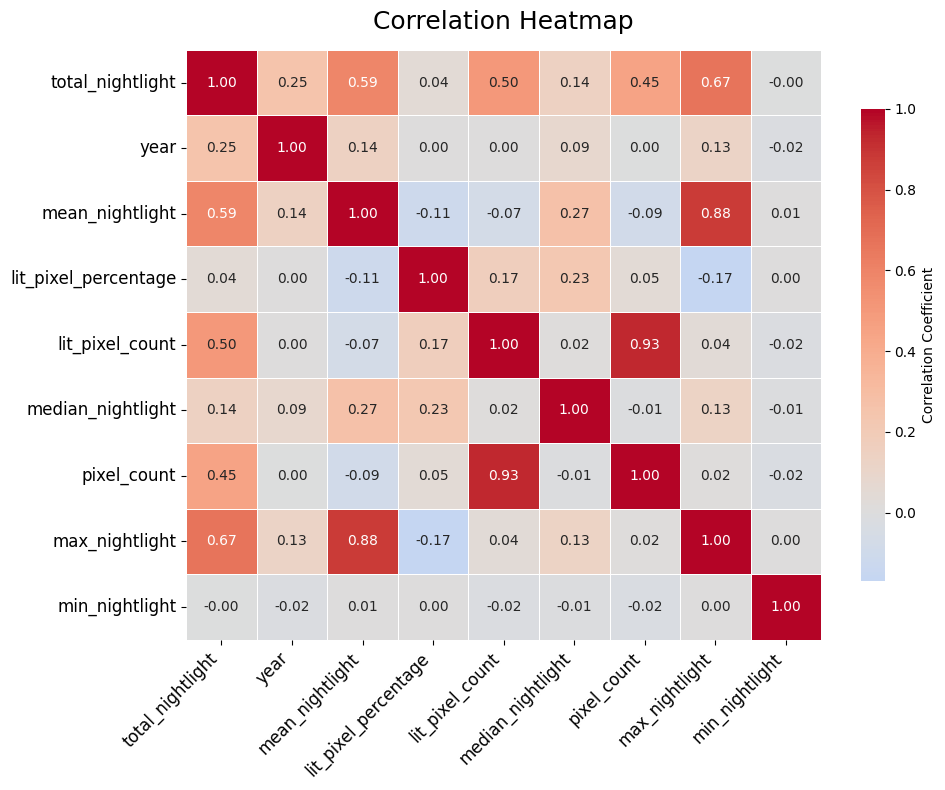

In [18]:
# Plot heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr,annot=True,fmt=".2f", cmap="coolwarm", center=0,linewidths=0.5,cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})
# Title and labels
plt.title("Correlation Heatmap", fontsize=18, pad=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

#### `Top 3 Variable Pairs with Highest Correlations`

1. pixel_count & lit_pixel_count: `0.93`
Interpretation: Higher pixel counts are associated with more lit pixels, indicating that areas with greater infrastructure coverage tend to be brighter.

2. max_nightlight & mean_nightlight: `0.88`
Interpretation: Regions with higher peak nightlight intensity also exhibit higher average nightlight values.

3. max_nightlight & total_nightlight: `0.67`
Interpretation: Areas with higher maximum nightlight tend to have greater total nightlight, reflecting more developed or illuminated regions.

### Nightlight Trend Analysis:
1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.



In [19]:
# merge the 2024 and 2015 dataframes on the dist_name column and keep only the specified columns
df1 = df.query("year == 2024").merge(df.query("year == 2015"), on='dist_name', suffixes=('_2024', '_2015'))[['dist_name', 'total_nightlight_2015', 'total_nightlight_2024']].round(2)
df1.head()

,dist_name,total_nightlight_2015,total_nightlight_2024
0,Burera,1.90,11.61
1,Burera,1.54,11.61
2,Burera,1.45,11.61
3,Burera,2.82,11.61
4,Burera,3.65,11.61


In [20]:
df1=df1.groupby(['dist_name'])['total_nightlight_2015'].mean().reset_index().merge(
    df1.groupby(['dist_name'])['total_nightlight_2024'].mean().reset_index(),
    on='dist_name',suffixes=('_2015', '_2024'))# calculate the mean of total_nightlight for each district in 2015 and 2024

In [21]:
df1['nightlight_growth'] = round((df1['total_nightlight_2024'] - df1['total_nightlight_2015']) / df1['total_nightlight_2015'] * 100, 2)
df1.sort_values(by='nightlight_growth', ascending=False, inplace=True)# sort the dataframe by nightlight_growth in descending order

In [22]:
df1.head()# display the first few rows of the dataframe with the new columns

,dist_name,total_nightlight_2015,total_nightlight_2024,nightlight_growth
0,Bugesera,8.917083,75.365139,745.18
28,Rutsiro,4.826923,33.995692,604.29
12,Kirehe,6.303667,44.384333,604.10
18,Nyagatare,6.821604,46.182170,577.00
1,Burera,2.861014,19.050000,565.85


## ``Top 5 districts with highest nightlight growth``

In [23]:
df1.head()# display the first few rows of the dataframe with the new columns

,dist_name,total_nightlight_2015,total_nightlight_2024,nightlight_growth
0,Bugesera,8.917083,75.365139,745.18
28,Rutsiro,4.826923,33.995692,604.29
12,Kirehe,6.303667,44.384333,604.10
18,Nyagatare,6.821604,46.182170,577.00
1,Burera,2.861014,19.050000,565.85


 ### `Top 5 districts with lowestest nightlight growth`


In [24]:
df1.tail()# display the last few rows of the dataframe with the new columns

,dist_name,total_nightlight_2015,total_nightlight_2024,nightlight_growth
25,Ruhango,9.071525,30.924068,240.89
3,Gasabo,50.068767,157.621781,214.81
7,Huye,9.350500,27.640250,195.60
10,Kayonza,31.798462,83.055577,161.19
22,Nyarugenge,32.001915,68.737021,114.79


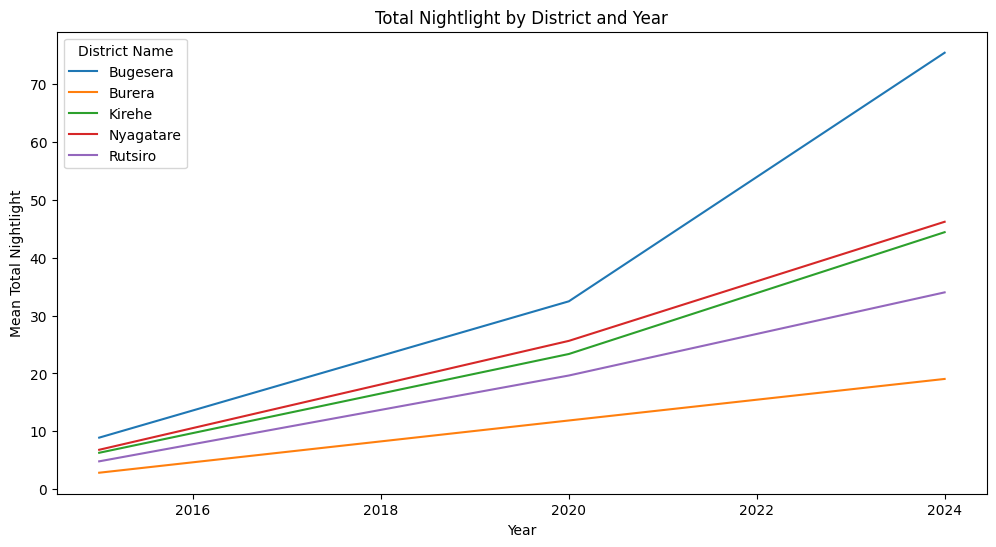

In [25]:
dfx=df[df['dist_name'].isin(['Bugesera', 'Rutsiro', 'Kirehe','Nyagatare','Burera'])].groupby(['dist_name','year'])['total_nightlight'].mean().reset_index().rename(columns={'total_nightlight': 'mean_total_nightlight'})
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfx, x='year', y='mean_total_nightlight', hue='dist_name')
plt.title('Total Nightlight by District and Year')
plt.xlabel('Year')
plt.ylabel('Mean Total Nightlight')
plt.legend(title='District Name')
plt.show()

## Part C: Modeling

### Multivariate Linear Regression:
1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors. Explore as many variables as possible at the beginning.
2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.
3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population-infrastructure relationships.



## Notes and Other Requirements
Please follow the genral guidelines below when preparing your analysis..

### Statistical Analysis:
- Properly handle missing data and outliers
- Use appropriate statistical tests and report p-values
- Calculate and interpret correlation coefficients
- Validate regression assumptions (normality, homoscedasticity)

### Data Management:
- Document all data cleaning and aggregation steps using markdown 
- Ensure consistent district naming across datasets

### Visualization Standards:
- Create clear, publication-quality heatmaps with appropriate color scales
- Design effective time series plots for nightlight trends
- Include proper axis labels, titles, and legends
- Use consistent formatting across all visualizations

### Reporting Requirements:
- Clearly state the top 3 most predictive variables with statistical justification
- Provide ranked lists for nightlight growth districts with supporting metrics
- Include model performance statistics and interpretation
- Document all methodological choices and assumptions